# 03 - Graphical Causal Models
 
 
## Thinking About Causality


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt

color=['0.3', '0.5', '0.7', '0.9']
linestyle=['-', '--', ':', '-.']
marker=['o', 'v', 'd', 'p']

pd.set_option('display.max_rows', 6)

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("./data/cross_sell_email.csv")
data

,gender,cross_sell_email,age,conversion
0,0,short,15,0
1,1,short,27,0
2,1,long,17,0
...,...,...,...,...
320,0,no_email,15,0
321,1,no_email,16,0
322,1,long,24,1


### Visualizing Causal Relationships 


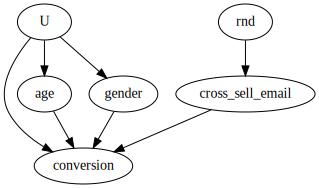

In [3]:
import graphviz as gr

g_cross_sell = gr.Digraph()

g_cross_sell.edge("U", "conversion")
g_cross_sell.edge("U", "age")
g_cross_sell.edge("U", "gender")

g_cross_sell.edge("rnd", "cross_sell_email")
g_cross_sell.edge("cross_sell_email", "conversion")
g_cross_sell.edge("age", "conversion")
g_cross_sell.edge("gender", "conversion")

g_cross_sell

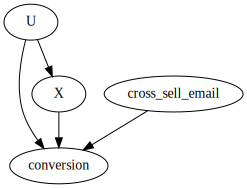

In [4]:
g_cross_sell = gr.Digraph()

g_cross_sell.edge("U", "conversion")
g_cross_sell.edge("U", "X")

g_cross_sell.edge("cross_sell_email", "conversion")
g_cross_sell.edge("X", "conversion")

g_cross_sell

### Are Consultants Worth it?


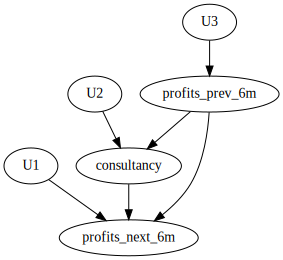

In [5]:
g_consultancy = gr.Digraph()

g_consultancy.edge("U1", "profits_next_6m")
g_consultancy.edge("U2", "consultancy")
g_consultancy.edge("U3", "profits_prev_6m")

g_consultancy.edge("consultancy", "profits_next_6m")

g_consultancy.edge("profits_prev_6m", "consultancy")
g_consultancy.edge("profits_prev_6m", "profits_next_6m")

g_consultancy


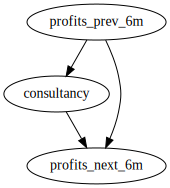

In [6]:
g_consultancy = gr.Digraph()

g_consultancy.edge("consultancy", "profits_next_6m")
g_consultancy.edge("profits_prev_6m", "consultancy")
g_consultancy.edge("profits_prev_6m", "profits_next_6m")

g_consultancy

## Crash Course in Graphical Models

### Chains
 

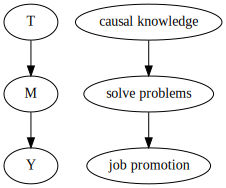

In [7]:
g = gr.Digraph()

g.edge("T", "M")
g.edge("M", "Y")
g.node("M", "M")


g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")

g

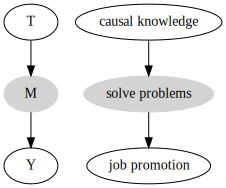

In [8]:
g = gr.Digraph()

g.edge("T", "M")
g.edge("M", "Y")
g.node("M", "M")
g.node("M", color="lightgrey", style="filled")


g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")
g.node("solve problems", color="lightgrey", style="filled")

g

 
## Forks


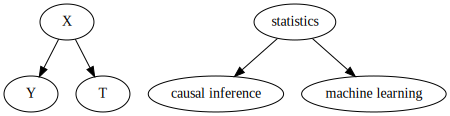

In [9]:
g = gr.Digraph()


g.edge("X", "Y")
g.edge("X", "T")
g.node("X", "X")

g.edge("statistics", "causal inference")
g.edge("statistics", "machine learning")

g

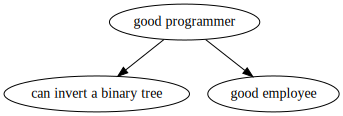

In [10]:
g = gr.Digraph()

g.edge("good programmer", "can invert a binary tree")
g.edge("good programmer", "good employee")

g

 
## Immorality or Collider 


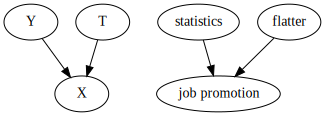

In [11]:
g = gr.Digraph()

g.edge("Y", "X")
g.edge("T", "X")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")

g

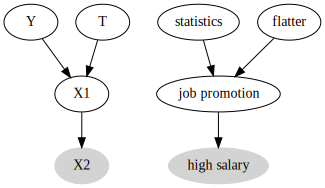

In [12]:
g = gr.Digraph()

g.edge("Y", "X1")
g.edge("T", "X1")
g.edge("X1", "X2")
g.node("X2", color="lightgrey", style="filled")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")
g.edge("job promotion", "high salary")

g.node("high salary", color="lightgrey", style="filled")

g

### The Flow of Association Cheat Sheet


### Querying a Graph in Python


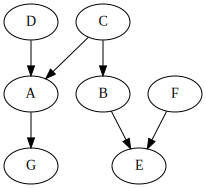

In [13]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")
g.edge("D", "A")
g.edge("B", "E")
g.edge("F", "E")
g.edge("A", "G")

g

In [14]:
import networkx as nx

model = nx.DiGraph([
    ("C", "A"),
    ("C", "B"),
    ("D", "A"),
    ("B", "E"),
    ("F", "E"),
    ("A", "G"),
])


In [15]:
print("Are D and C dependent?")
print(not(nx.d_separated(model, {"D"}, {"C"}, {})))

print("Are D and C dependent given A?")
print(not(nx.d_separated(model, {"D"}, {"C"}, {"A"})))

print("Are D and C dependent given A?")
print(not(nx.d_separated(model, {"D"}, {"C"}, {"G"})))

Are D and C dependent?
False
Are D and C dependent given A?
True
Are D and C dependent given A?
True


In [16]:
print("Are G and D dependent?")
print(not(nx.d_separated(model, {"G"}, {"D"}, {})))

print("Are G and D dependent given A?")
print(not(nx.d_separated(model, {"G"}, {"D"}, {"A"})))

Are G and D dependent?
True
Are G and D dependent given A?
False


In [17]:
print("Are A and B dependent?")
print(not(nx.d_separated(model, {"A"}, {"B"}, {})))

print("Are A and B dependent given A?")
print(not(nx.d_separated(model, {"A"}, {"B"}, {"C"})))

Are A and B dependent?
True
Are A and B dependent given A?
False


In [18]:
print("Are G and F dependent?")
print(not(nx.d_separated(model, {"G"}, {"F"}, {})))

print("Are G and F dependent given E?")
print(not(nx.d_separated(model, {"G"}, {"F"}, {"E"})))

Are G and F dependent?
False
Are G and F dependent given E?
True


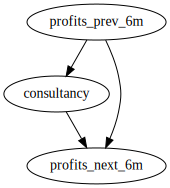

In [19]:
g_consultancy

 
## Identification Revisited


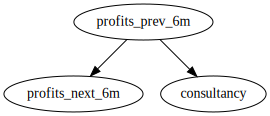

In [20]:
consultancy_sev = gr.Digraph()
consultancy_sev.edge("profits_prev_6m", "profits_next_6m")
consultancy_sev.edge("profits_prev_6m", "consultancy")

consultancy_sev

In [21]:
consultancy_model_severed = nx.DiGraph([
    ("profits_prev_6m", "profits_next_6m"),
    ("profits_prev_6m", "consultancy"),
#     ("consultancy", "profits_next_6m"), # causal relationship removed
])

not(nx.d_separated(consultancy_model_severed,
                   {"consultancy"}, {"profits_next_6m"}, {}))

True

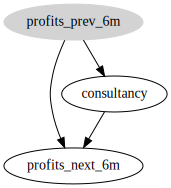

In [22]:
g_consultancy = gr.Digraph()
g_consultancy.edge("profits_prev_6m", "profits_next_6m")
g_consultancy.edge("profits_prev_6m", "consultancy")
g_consultancy.edge("consultancy", "profits_next_6m")
g_consultancy.node("profits_prev_6m", color="lightgrey", style="filled")

g_consultancy

## CIA and The Adjustment Formula
 
### Positivity Assumption


## An Identification Example with Data
 

In [23]:
df = pd.DataFrame(dict(
    profits_prev_6m=[1.0, 1.0, 1.0, 5.0, 5.0, 5.0],
    consultancy=[0, 0, 1, 0, 1, 1],
    profits_next_6m=[1, 1.1, 1.2, 5.5, 5.7, 5.7],
    
))

df

,profits_prev_6m,consultancy,profits_next_6m
0,1.0,0,1.0
1,1.0,0,1.1
2,1.0,1,1.2
3,5.0,0,5.5
4,5.0,1,5.7
5,5.0,1,5.7


In [24]:
(df.query("consultancy==1")["profits_next_6m"].mean() 
 - df.query("consultancy==0")["profits_next_6m"].mean())

1.666666666666667

In [25]:
avg_df = (df
          .groupby(["consultancy", "profits_prev_6m"])
          ["profits_next_6m"]
          .mean())

avg_df.loc[1] - avg_df.loc[0] 

profits_prev_6m
1.0    0.15
5.0    0.20
Name: profits_next_6m, dtype: float64

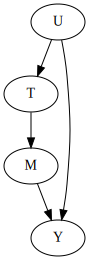

In [26]:
g = gr.Digraph()
g.edge("U", "T")
g.edge("U", "Y")
g.edge("T", "M")
g.edge("M", "Y")

g

## Confounding Bias


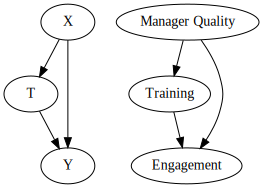

In [27]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("Manager Quality", "Training"),
g.edge("Manager Quality", "Engagement"),
g.edge("Training", "Engagement")
g


### Surrogate Confounding


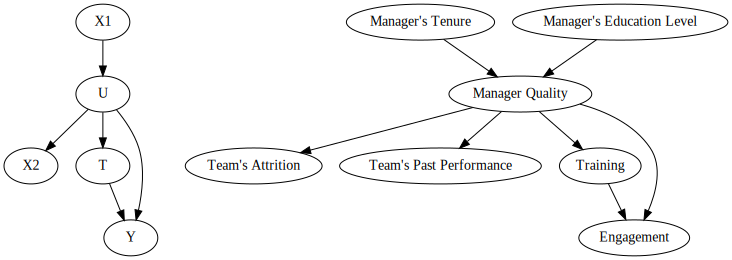

In [28]:
g = gr.Digraph()
g.edge("X1", "U")
g.edge("U", "X2")
g.edge("U", "T")
g.edge("T", "Y")
g.edge("U", "Y")

g.edge("Manager Quality", "Team's Attrition")
g.edge("Manager Quality", "Team's Past Performance")
g.edge("Manager's Tenure", "Manager Quality")
g.edge("Manager's Education Level", "Manager Quality")

g.edge("Manager Quality", "Training")
g.edge("Training", "Engagement")
g.edge("Manager Quality", "Engagement")

g

### Randomization Revisited


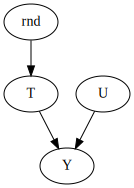

In [29]:
g = gr.Digraph()
g.edge("rnd", "T")
g.edge("T", "Y")
g.edge("U", "Y")

g

## Selection Bias
 
### Conditioning on a Collider


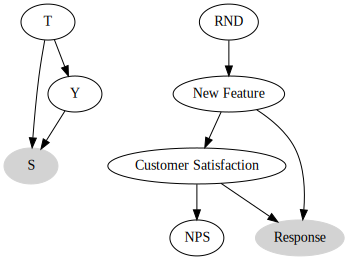

In [30]:
g = gr.Digraph()
g.edge("T", "S")
g.edge("T", "Y")
g.edge("Y", "S")
g.node("S", color="lightgrey", style="filled")

g.edge("RND", "New Feature"),
g.edge("New Feature", "Customer Satisfaction"),
g.edge("Customer Satisfaction", "NPS"),
g.edge("Customer Satisfaction", "Response"),
g.edge("New Feature", "Response"),
g.node("Response", "Response", color="lightgrey", style="filled")

g

In [31]:
nps_model = nx.DiGraph([
   ("RND", "New Feature"),
#     ("New Feature", "Customer Satisfaction"),
    ("Customer Satisfaction", "NPS"),
    ("Customer Satisfaction", "Response"),
    ("New Feature", "Response"),
])


not(nx.d_separated(nps_model, {"NPS"}, {"New Feature"}, {"Response"}))

True

In [32]:
np.random.seed(2)
n = 100000
new_feature = np.random.binomial(1, 0.5, n)

satisfaction_0 = np.random.normal(0, 0.5, n)
satisfaction_1 = satisfaction_0 + 0.4
satisfaction = new_feature*satisfaction_1 + (1-new_feature)*satisfaction_0

nps_0 = np.random.normal(satisfaction_0, 1)
nps_1 = np.random.normal(satisfaction_1, 1)
nps = new_feature*nps_1 + (1-new_feature)*nps_0


responded  = (np.random.normal(0 + new_feature + satisfaction, 1) > 1).astype(int)

tr_df = pd.DataFrame(dict(new_feature=new_feature,
                          responded=responded,
                          nps_0=nps_0,
                          nps_1=nps_1,
                          nps=nps))

tr_df_measurable = pd.DataFrame(dict(new_feature=new_feature,
                                     responded=responded,
                                     nps_0=np.nan,
                                     nps_1=np.nan,
                                     nps=np.where(responded, nps, np.nan)))

tr_df.groupby("new_feature").mean()

,responded,nps_0,nps_1,nps
new_feature,,,,
0,0.183715,-0.005047,0.395015,-0.005047
1,0.639342,-0.005239,0.401082,0.401082


In [33]:
tr_df_measurable.groupby("new_feature").mean().assign(**{"nps": np.nan})

,responded,nps_0,nps_1,nps
new_feature,,,,
0,0.183715,NaN,NaN,NaN
1,0.639342,NaN,NaN,NaN


In [34]:
tr_df_measurable.groupby(["responded", "new_feature"]).mean()

nps_0  nps_1       nps
responded new_feature                        
0         0              NaN    NaN       NaN
          1              NaN    NaN       NaN
1         0              NaN    NaN  0.314073
          1              NaN    NaN  0.536106

In [35]:
tr_df.groupby(["responded", "new_feature"]).mean()

nps_0     nps_1       nps
responded new_feature                              
0         0           -0.076869  0.320616 -0.076869
          1           -0.234852  0.161725  0.161725
1         0            0.314073  0.725585  0.314073
          1            0.124287  0.536106  0.536106

### Adjusting for Selection Bias


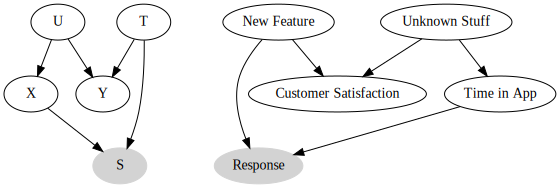

In [36]:
g = gr.Digraph()

g.edge("U", "X")
g.edge("X", "S")
g.edge("U", "Y")
g.edge("T", "Y")
g.edge("T", "S")
g.node("S", color="lightgrey", style="filled")

g.edge("New Feature", "Customer Satisfaction"),
g.edge("Unknown Stuff", "Customer Satisfaction"),
g.edge("Unknown Stuff", "Time in App"),
g.edge("Time in App", "Response"),
g.edge("New Feature", "Response"),

g.node("Response", "Response", color="lightgrey", style="filled")

g

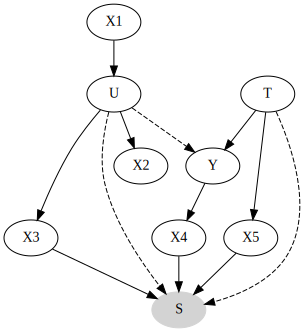

In [37]:
g = gr.Digraph()

g.edge("X1", "U")
g.edge("U", "X2")
g.edge("X5", "S")
g.edge("U", "Y",style="dashed")
g.edge("U", "S",style="dashed")
g.edge("U", "X3")
g.edge("X3", "S")
g.edge("Y", "X4")
g.edge("X4", "S")
g.edge("T", "X5")
g.edge("T", "Y")
g.edge("T", "S", style="dashed")
g.node("S", color="lightgrey", style="filled")

g

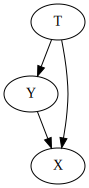

In [38]:
g = gr.Digraph()

g.edge("Y", "X")
g.edge("T", "X")
g.edge("T", "Y")

g

### Conditioning on a Mediator


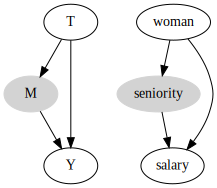

In [39]:
g = gr.Digraph()
g.edge("T", "M")
g.edge("T", "Y")
g.edge("M", "Y")
g.node("M", color="lightgrey", style="filled")

g.edge("woman", "seniority")
g.edge("woman", "salary")
g.edge("seniority", "salary")
g.node("seniority", color="lightgrey", style="filled")

g

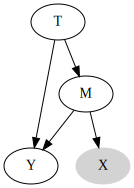

In [40]:
g = gr.Digraph()
g.edge("T", "M")
g.edge("T", "Y")
g.edge("M", "Y")
g.edge("M", "X")
g.node("X", color="lightgrey", style="filled")
g

## Key Ideas


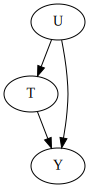

In [41]:
g = gr.Digraph()
g.edge("U", "T")
g.edge("U", "Y")
g.edge("T", "Y")

g

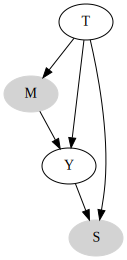

In [42]:
g = gr.Digraph()
g.edge("T", "M")
g.edge("M", "Y")
g.edge("T", "Y")
g.edge("T", "S")
g.edge("Y", "S")

g.node("M", color="lightgrey", style="filled")
g.node("S", color="lightgrey", style="filled")

g

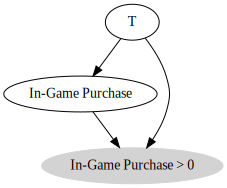

In [43]:
g = gr.Digraph()
g.edge("T", "In-Game Purchase")
g.edge("T", "In-Game Purchase > 0")
g.edge("In-Game Purchase", "In-Game Purchase > 0")

g.node("In-Game Purchase > 0", color="lightgrey", style="filled")

g

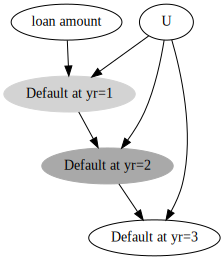

In [44]:
g = gr.Digraph()
g.edge("loan amount", "Default at yr=1")
g.edge("Default at yr=1", "Default at yr=2")
g.edge("Default at yr=2", "Default at yr=3")
g.edge("U", "Default at yr=1")
g.edge("U", "Default at yr=2")
g.edge("U", "Default at yr=3")

g.node("Default at yr=1", color="lightgrey", style="filled")
g.node("Default at yr=2", color="darkgrey", style="filled")

g